In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

In [274]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#from geopy.distance import vincenty
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
from scipy.spatial.distance import cdist, pdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#from mpl_toolkits.basemap import Basemap
import copy
import json
import math
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [275]:
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#from geopy.distance import vincenty
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
from scipy.spatial.distance import cdist, pdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#from mpl_toolkits.basemap import Basemap
import copy
import json
import math
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## second floor before covid19

In [276]:
df_before = pd.read_csv("/Users/ruichao/Desktop/datapart2/03.txt")
df_before.columns = ['building', 'location', 'macaddress','latitude','longitude','date','time']

In [277]:
df_before = df_before[(df_before['time'] > "06:00:00") & (df_before['time'] < "22:00:00")]

In [278]:
df_before['macaddress'].value_counts(ascending=False)

a4:c3:f0:a5:f0:b9    15256
98:10:e8:39:b8:4d    15090
98:ca:33:95:8c:fa    14793
e4:a7:a0:99:db:cb    14693
a4:c3:f0:a1:fc:0c    13674
                     ...  
e4:04:39:9d:44:3a        3
58:d9:c3:eb:af:87        3
e4:a7:a0:99:dc:9d        3
04:69:f8:5a:69:e3        3
88:66:a5:0f:64:04        3
Name: macaddress, Length: 1420, dtype: int64

In [279]:
df_before['date'].value_counts(ascending=False)

2020-03-02    342253
2020-03-04    342223
2020-03-03    338295
2020-03-05    304921
2020-03-09    153331
2020-03-06    134968
2020-02-28     18276
2020-02-29      4802
2020-03-08      1426
2020-03-01      1242
2020-03-07      1038
Name: date, dtype: int64

In [280]:
df_one_day = df_before[df_before['date'] == '2020-03-08']

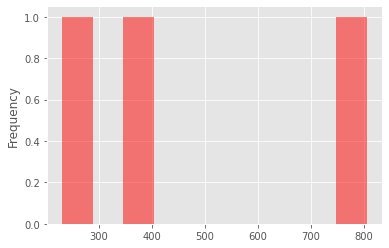

In [281]:
series = df_one_day['macaddress'].value_counts(ascending=False)
list_ = series.to_list()
p = series.plot(kind='hist', color='r', alpha=0.5)

## average daily count of macaddress before covid 19

In [282]:
avg_count_before = sum(df_before['date'].value_counts(ascending=False))/len(df_before['date'].value_counts(ascending=False))
print('the average daily count of macaddress before covid 19 is ', avg_count_before)

the average daily count of macaddress before covid 19 is  149343.18181818182


In [283]:
df_one_day.reset_index(inplace=True)
df_one_day

,index,building,location,macaddress,latitude,longitude,date,time
0,153331,UK Office,1st Floor,c4:6e:1f:1c:f2:9b,51.460360,-0.932516,2020-03-08,21:59:57
1,153332,UK Office,1st Floor,c4:6e:1f:1c:f2:9b,51.460360,-0.932516,2020-03-08,21:59:43
2,153333,UK Office,1st Floor,c4:6e:1f:1c:f2:9b,51.460360,-0.932516,2020-03-08,21:59:34
3,153334,UK Office,1st Floor,c4:6e:1f:1c:f2:9b,51.460360,-0.932516,2020-03-08,21:59:25
4,153335,UK Office,1st Floor,c4:6e:1f:1c:f2:9b,51.460360,-0.932517,2020-03-08,21:59:17
...,...,...,...,...,...,...,...,...
1421,154752,UK Office,1st Floor,04:ea:56:92:f9:9b,51.460371,-0.932527,2020-03-08,06:05:54
1422,154753,UK Office,1st Floor,04:ea:56:92:f9:9b,51.460371,-0.932527,2020-03-08,06:05:48
1423,154754,UK Office,1st Floor,04:ea:56:92:f9:9b,51.460371,-0.932527,2020-03-08,06:05:38
1424,154755,UK Office,1st Floor,04:ea:56:92:f9:9b,51.460371,-0.932527,2020-03-08,06:05:22


## kmeans clustering

In [284]:
loc_sum_lst2 = []
for i in range(len(df_one_day)):
    loc_lst2 = []
    loc_lst2.append(df_one_day['latitude'][i])
    loc_lst2.append(df_one_day['longitude'][i])
    loc_sum_lst2.append(loc_lst2)

In [285]:
len(loc_sum_lst2)

1426

In [286]:
coordinates2= np.array(loc_sum_lst2)
c2 = whiten(coordinates2)

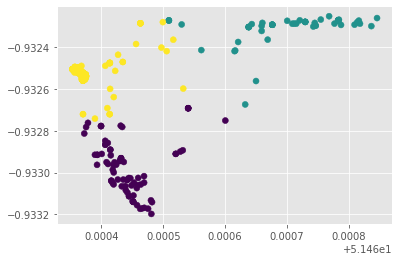

In [287]:
x, y = kmeans2(whiten(coordinates2), 3, iter = 20)  
plt.scatter(coordinates2[:,0], coordinates2[:,1], c=y);
plt.show()

In [288]:
list_y = list(y)

In [289]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [290]:
# K_clusters = range(1,10)
# kmeans = [KMeans(n_clusters=i) for i in K_clusters]
# Y_axis = df_one_day[['longitude']]
# X_axis = df_one_day[['latitude']]
# score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# # Visualize
# plt.plot(K_clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()

## second floor after covid19

In [291]:
df_after = pd.read_csv("/Users/ruichao/Desktop/datapart2/01.txt")
df_after.columns = ['building', 'location', 'macaddress','latitude','longitude','date','time']
df_after = df_after[(df_after['time'] > "06:00:00") & (df_after['time'] < "22:00:00")]
df_after['macaddress'].value_counts(ascending=False)
df_after['date'].value_counts(ascending=False)


2020-03-12    353886
2020-03-10    321500
2020-03-11    312804
2020-03-16    236174
2020-03-09    108715
2020-03-13     95198
2020-03-17     12547
2020-03-20      2761
2020-03-21      2630
2020-03-18      2051
2020-03-14      1537
2020-03-19      1256
2020-03-15      1092
Name: date, dtype: int64

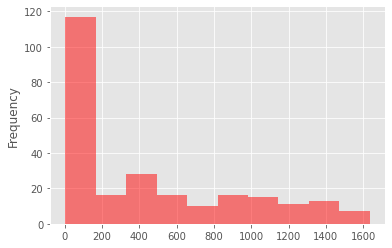

In [292]:
df_oneday2 = df_after[df_after['date'] == '2020-03-09']
series2 = df_oneday2['macaddress'].value_counts(ascending=False)
list_2 = series2.to_list()
p = series2.plot(kind='hist', color='r', alpha=0.5)

In [293]:
df_oneday2.reset_index(inplace=True)

## k-means clustering

In [294]:
loc_sum_lst = []
for i in range(len(df_oneday2)):
    loc_lst = []
    loc_lst.append(df_oneday2['latitude'][i])
    loc_lst.append(df_oneday2['longitude'][i])
    loc_sum_lst.append(loc_lst)

In [295]:
coordinates= np.array(loc_sum_lst)
c = whiten(coordinates)

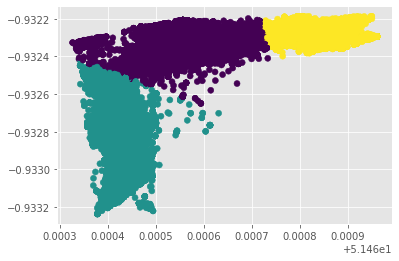

In [296]:
x, y2 = kmeans2(whiten(coordinates), 3, iter = 20)  
plt.scatter(coordinates[:,0], coordinates[:,1], c=y2);
plt.show()

In [297]:
list_y2 = list(y2)

In [298]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [299]:
# K_clusters = range(1,10)
# kmeans = [KMeans(n_clusters=i) for i in K_clusters]
# Y_axis = df_oneday2[['longitude']]
# X_axis = df_oneday2[['latitude']]
# score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# # Visualize
# plt.plot(K_clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()

## average daily count of macaddress after covid 19

In [300]:
avg_count_after = sum(df_after['date'].value_counts(ascending=False))/len(df_after['date'].value_counts(ascending=False))
print('average daily count of macaddress after covid 19 is ', avg_count_after)

average daily count of macaddress after covid 19 is  111703.92307692308


In [301]:
count_list = []
for i in range(len(list_2)):
    sublist = []
    sublist.append('2020-08-03')
    sublist.append(list_2[i])
    count_list.append(sublist)
    

In [302]:
#list(set(df_after['date']))

In [303]:
# series2_unsorted = df_oneday2['macaddress'].value_counts
# type(series2)

In [304]:
# list(df_after['date'].value_counts)

## generate dataset

In [305]:
##before covid-19
new_list_y = [x+1 for x in list_y]
df_one_day['label'] = new_list_y
new_list_y2 = [x+1 for x in list_y2]
df_oneday2['label'] = new_list_y2

In [306]:
#before_covid = df_one_day.to_csv('before_covid_1st_floor_0308.csv')

In [307]:
# after_covid = df_oneday2.to_csv('after_covid_1st_floor_0309.csv')

In [308]:
# df1 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0228.csv")
# df2 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0229.csv")
# df3 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0301.csv")
# df4 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0303.csv")
# df5 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0304.csv")
# df6 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0305.csv")
# df7 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0306.csv")
# df8 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0307.csv")
# df9 = pd.read_csv("/Users/ruichao/Desktop/before_covid_1st_floor_0308.csv")
# df10 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0309.csv")
# df11 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0310.csv")
# df12 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0311.csv")
# df13 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0312.csv")
# df14 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0313.csv")
# df15 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0314.csv")
# df16 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0315.csv")
# df17 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0316.csv")
# df18 = pd.read_csv("/Users/ruichao/Desktop/after_covid_1st_floor_0317.csv")

In [309]:
#df10

,Unnamed: 0,index,building,location,macaddress,latitude,longitude,date,time,label
0,0,1343436,UK Office,1st Floor,b4:ef:39:c3:4a:2a,51.460374,-0.932536,2020-03-09,21:43:47,1
1,1,1343437,UK Office,1st Floor,b4:ef:39:c3:4a:2a,51.460370,-0.932530,2020-03-09,21:43:33,1
2,2,1343438,UK Office,1st Floor,b4:ef:39:c3:4a:2a,51.460370,-0.932530,2020-03-09,21:43:24,1
3,3,1343439,UK Office,1st Floor,b4:ef:39:c3:4a:2a,51.460370,-0.932530,2020-03-09,21:43:12,1
4,4,1343440,UK Office,1st Floor,b4:ef:39:c3:4a:2a,51.460370,-0.932530,2020-03-09,21:43:05,1
...,...,...,...,...,...,...,...,...,...,...
108710,108710,1452146,UK Office,1st Floor,5c:5f:67:8b:1b:31,51.460898,-0.932290,2020-03-09,13:23:48,3
108711,108711,1452147,UK Office,1st Floor,48:a4:72:ae:12:4e,51.460847,-0.932325,2020-03-09,13:23:48,3
108712,108712,1452148,UK Office,1st Floor,e4:a7:a0:99:db:cb,51.460417,-0.932692,2020-03-09,13:23:47,1
108713,108713,1452149,UK Office,1st Floor,48:45:20:4b:c2:51,51.460749,-0.932243,2020-03-09,13:23:47,3


In [310]:
# merged_df_aftercovid = pd.concat([df10, df11, df12, df13, df14, df15, df16, df17, df18],ignore_index=True)

In [311]:
# merged_df_aftercovid

In [312]:
# merged_df_aftercovid['label'][3456:9994]

In [313]:
# combined_data = merged_df_aftercovid.to_csv('merged_data_aftercovid.csv')
#combined_data

In [314]:
# df19 = pd.read_csv("/Users/ruichao/Desktop/merged_data.csv")
# len(df19)

In [315]:
# k = 0
# for i in range(len(df19)):
#     if df19['date'][i] == '2020-08-30':
#         k +=1 
# print(k)
        

In [322]:
df_ = pd.read_csv("/Users/ruichao/Desktop/before_covid_whole_data.csv")
set(df_['date'])

{'2019-10-23', '2019-10-28', '2019-12-03'}

In [319]:
len(df_)

797348

In [6]:
# data1 = pd.read_csv("/Users/ruichao/Desktop/after_preprocessed_train1.csv")
# data2 = pd.read_csv("/Users/ruichao/Desktop/after_preprocessed_train2.csv")
# data3 = pd.read_csv("/Users/ruichao/Desktop/after_preprocessed_train3.csv")
# mergedata = pd.concat([data1,data2,data3],ignore_index=True)

In [7]:
# mergedata

In [4]:
# combined_data = mergedata.to_csv('combined_training_data.csv')